### Download Dataset from Google Drive


In this step, we download the file using the "!gdown" command to download the file shared via Google Drive. After that, we extract the zip file.

In [1]:
# https://drive.google.com/file/d/1pN7dr3rlXqxTkEnrshdkoa_zDo-A6l8p/view?usp=share_link
!gdown 1pN7dr3rlXqxTkEnrshdkoa_zDo-A6l8p -O data.zip

Downloading...
From: https://drive.google.com/uc?id=1pN7dr3rlXqxTkEnrshdkoa_zDo-A6l8p
To: /content/data.zip
100% 99.9M/99.9M [00:02<00:00, 48.3MB/s]


In [2]:
# Unzip the .zip file
!unzip data.zip

Archive:  data.zip
   creating: DATASET/Batik Betawi/
  inflating: DATASET/Batik Betawi/0.jpg  
  inflating: DATASET/Batik Betawi/1.jpg  
  inflating: DATASET/Batik Betawi/10.jpg  
  inflating: DATASET/Batik Betawi/11.jpg  
  inflating: DATASET/Batik Betawi/12.jpg  
  inflating: DATASET/Batik Betawi/13.jpg  
  inflating: DATASET/Batik Betawi/14.jpg  
  inflating: DATASET/Batik Betawi/15.jpg  
  inflating: DATASET/Batik Betawi/16.jpg  
  inflating: DATASET/Batik Betawi/17.jpg  
  inflating: DATASET/Batik Betawi/18.jpg  
  inflating: DATASET/Batik Betawi/19.jpg  
  inflating: DATASET/Batik Betawi/2.jpg  
  inflating: DATASET/Batik Betawi/20.jpg  
  inflating: DATASET/Batik Betawi/21.jpg  
  inflating: DATASET/Batik Betawi/22.jpg  
  inflating: DATASET/Batik Betawi/23.jpg  
  inflating: DATASET/Batik Betawi/24.jpg  
  inflating: DATASET/Batik Betawi/25.jpg  
  inflating: DATASET/Batik Betawi/26.jpg  
  inflating: DATASET/Batik Betawi/27.jpg  
  inflating: DATASET/Batik Betawi/28.jpg  
  i

### Split Data

In [3]:
# Install and Import Splitfolders Packages
! pip install split-folders
import splitfolders

splitfolders.ratio('/content/DATASET', output="/content/DATASET_KAIN", seed=1, ratio=(0.8,0.2))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 1743 files [00:00, 2833.30 files/s]


In [4]:
# Define Path
import os

base_dir = '/content/DATASET_KAIN'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
lenClass = len(os.listdir(validation_dir))

### Image Augmentation

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
  
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    fill_mode='nearest',
                    horizontal_flip=True,
                    vertical_flip=True,
                    rotation_range=40,
                    shear_range=0.2,
                    zoom_range=0.2,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    )
  
validation_datagen = ImageDataGenerator(
                    rescale=1./255)
sizeImg = (224, 224)
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        color_mode='rgb',
        batch_size=32,
        class_mode='categorical',
        target_size=sizeImg)
  
validation_generator = validation_datagen.flow_from_directory(
        validation_dir, 
        color_mode='rgb',
        batch_size=32,
        class_mode='categorical',
        target_size=sizeImg)

Found 1389 images belonging to 15 classes.
Found 354 images belonging to 15 classes.


### Use Transfer Learning

In [6]:
from tensorflow.keras.applications import MobileNetV2

# Use MobileNetV2 pre-trained model for transfer learning ImageNet
base_model = MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3),
    alpha=1.0,
    pooling='avg' 
)

base_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


###Train The Model

In [7]:
# Create Model
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(lenClass, activation='softmax')
])
model.summary()
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics = ['accuracy'])
model_fit = model.fit(train_generator, 
                          epochs=35,
                          shuffle=True, 
                          validation_data=validation_generator
                        )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dense_1 (Dense)             (None, 15)                1935      
                                                                 
Total params: 2,423,887
Trainable params: 165,903
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/35
44/44 [==============================] - 46s 585ms/step - loss: 1.7927 - accuracy: 0.4550 - val

###Evaluate The Model Training

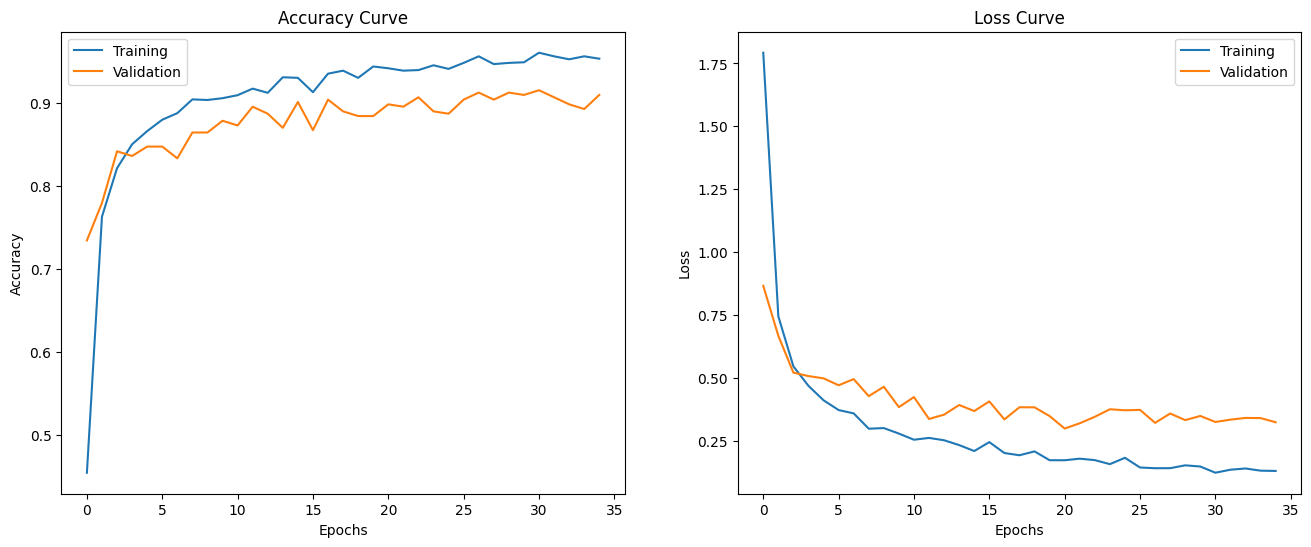

In [8]:
import matplotlib.pyplot as plt
train_acc = model_fit.history['accuracy']
train_loss = model_fit.history['loss']
val_acc = model_fit.history['val_accuracy']
val_loss = model_fit.history['val_loss']

plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.title('Accuracy Curve')
plt.plot(train_acc, label='Training')
plt.plot(val_acc, label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.title('Loss Curve')
plt.plot(train_loss, label='Training')
plt.plot(val_loss, label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

Saving ulo ragi hotang.jpg to ulo ragi hotang.jpg
1/1 [==============================] - 1s 1s/step
prediksi kain  Ulos Ragi Hotang
ulo ragi hotang.jpg
[[9.9667279e-09 2.1681382e-10 2.2288544e-09 4.0251848e-06 1.3216115e-08
  2.2828135e-11 5.6816085e-10 5.4207361e-10 1.2586250e-08 7.2382158e-09
  1.3741748e-02 1.3669707e-07 1.3407000e-05 8.2084852e-01 1.6539213e-01]]
13


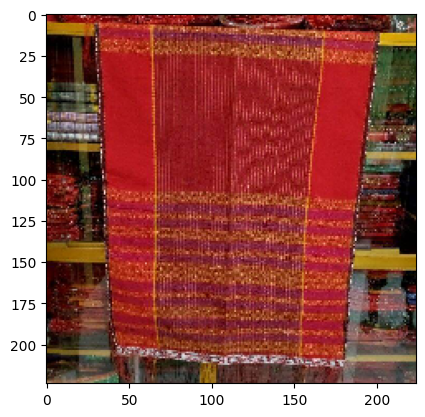

In [9]:
#Load Image
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
img = load_img(path, target_size=(224, 224))
x = img_to_array(img)/255.0
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=32)
predict_indices = train_generator.class_indices
prediksi = np.argmax(classes)

for key, value in predict_indices.items():
  if value == prediksi:
    print('prediksi kain ', key)


plt.imshow(img)
print(fn)
print(classes)
print( prediksi)

###Save The Model and Convert to .tflite

In [10]:
model.save('modelTrafa1.h5')

In [11]:
model_json = model.to_json()
with open("model_trafa.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("weight_trafa.h5")
print("Saved model to disk")

Saved model to disk


In [12]:
# load and evaluate a saved model
from keras.models import load_model

# load model
model = load_model('modelTrafa1.h5')

In [13]:
# nmodel= tf.keras.models.load_model(model)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TF Lite model.
with open("model_tflite.tflite", 'wb') as f:
  f.write(tflite_model)
  print("Saved model to disk")

Saved model to disk
